In [9]:
# 1. Import Libraries yang Diperlukan
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# 2. Mendefinisikan Parameter Simulasi
RANDOM_SEED = 42  # Supaya hasil bisa direplikasi
SIM_TIME = 1000   # Waktu simulasi (menit)
MIN_INTERARRIVAL = 2  # Jarak kedatangan minimum (menit)
MAX_INTERARRIVAL = 3  # Jarak kedatangan maksimum (menit)
MIN_SERVICE = 4  # Durasi layanan minimum (menit)
MAX_SERVICE = 7  # Durasi layanan maksimum (menit)
NUM_CASHIERS = 1  # Jumlah kasir (server)

In [11]:
# 3. Fungsi Generator untuk Kedatangan Pelanggan (Mobil)
def customer_generator(env, cashier):
    i = 0
    while True:
        i += 1
        inter_arrival = random.randint(MIN_INTERARRIVAL, MAX_INTERARRIVAL)
        yield env.timeout(inter_arrival)  # Waktu kedatangan antar pelanggan
        env.process(service_customer(env, f'Customer {i}', cashier))  # Melayani pelanggan


In [12]:
# 4. Fungsi Proses Layanan Pelanggan
def service_customer(env, customer_id, cashier):
    arrival_time = env.now  # Waktu kedatangan pelanggan
    with cashier.request() as request:  # Menunggu giliran kasir
        yield request
        start_service_time = env.now  # Waktu mulai dilayani
        service_duration = random.randint(MIN_SERVICE, MAX_SERVICE)  # Durasi layanan acak
        yield env.timeout(service_duration)  # Menunggu selama proses layanan
        finish_time = env.now  # Waktu selesai dilayani
        queue_time = start_service_time - arrival_time  # Durasi antrean
        system_time = finish_time - arrival_time  # Total waktu pelanggan di sistem
        
        # Mencatat data
        records.append({
            'customer_id': customer_id,
            'arrival_time': arrival_time,
            'start_service': start_service_time,
            'finish_time': finish_time,
            'queue_time': queue_time,
            'service_duration': service_duration,
            'system_time': system_time
        })


In [13]:
# 5. Menyusun Data dan Menjalankan Simulasi
records = []  # Daftar untuk menyimpan data
env = simpy.Environment()  # Lingkungan simulasi
cashier = simpy.Resource(env, capacity=NUM_CASHIERS)  # Server (kasir)

# Jalankan proses generator pelanggan
env.process(customer_generator(env, cashier))
env.run(until=SIM_TIME)  # Menjalankan simulasi selama SIM_TIME menit


In [14]:
# 6. Mengonversi Hasil Simulasi ke dalam DataFrame
df = pd.DataFrame(records)
df.head()  # Menampilkan 5 baris pertama data simulasi


,customer_id,arrival_time,start_service,finish_time,queue_time,service_duration,system_time
0,Customer 1,2,2,8,0,6,6
1,Customer 2,5,8,13,3,5,8
2,Customer 3,8,13,17,5,4,9
3,Customer 4,10,17,22,7,5,12
4,Customer 5,13,22,26,9,4,13


In [15]:
# 7. Eksperimen Skenario: Menambah Kasir (Server)
def run_simulation_with_multiple_servers(num_cashiers, env, records):
    records.clear()
    cashier = simpy.Resource(env, capacity=num_cashiers)  # Menambahkan lebih banyak kasir
    env.process(customer_generator(env, cashier))
    env.run(until=SIM_TIME)

In [18]:
# 8. Analisis Data (Skenario A vs B)
# Fungsi untuk menjalankan simulasi dan reset data
def run_simulation_with_multiple_servers(num_cashiers, env, records):
    records.clear()  # Reset data untuk eksperimen baru
    cashier = simpy.Resource(env, capacity=num_cashiers)  # Menambahkan lebih banyak kasir
    env.process(customer_generator(env, cashier))
    env.run(until=SIM_TIME)  # Menjalankan simulasi selama waktu tertentu

# Skenario A: 1 Kasir
env = simpy.Environment()  # Buat ulang environment
run_simulation_with_multiple_servers(1, env, records)  # Jalankan simulasi dengan 1 kasir
df_scenario_a = pd.DataFrame(records)  # DataFrame untuk Skenario A

# Skenario B: 2 Kasir
env = simpy.Environment()  # Buat ulang environment
run_simulation_with_multiple_servers(2, env, records)  # Jalankan simulasi dengan 2 kasir
df_scenario_b = pd.DataFrame(records)  # DataFrame untuk Skenario B


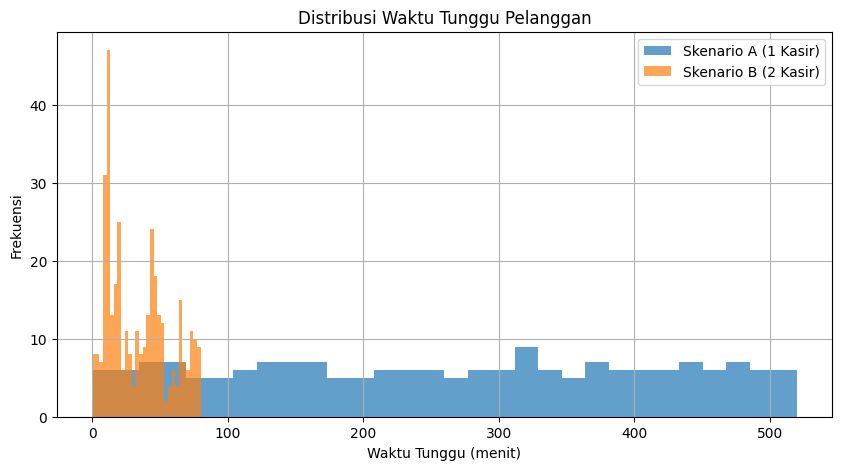

In [19]:
# 9. Visualisasi Histogram Waktu Tunggu Pelanggan
plt.figure(figsize=(10, 5))
plt.hist(df_scenario_a['queue_time'], bins=30, alpha=0.7, label='Skenario A (1 Kasir)')
plt.hist(df_scenario_b['queue_time'], bins=30, alpha=0.7, label='Skenario B (2 Kasir)')
plt.title('Distribusi Waktu Tunggu Pelanggan')
plt.xlabel('Waktu Tunggu (menit)')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

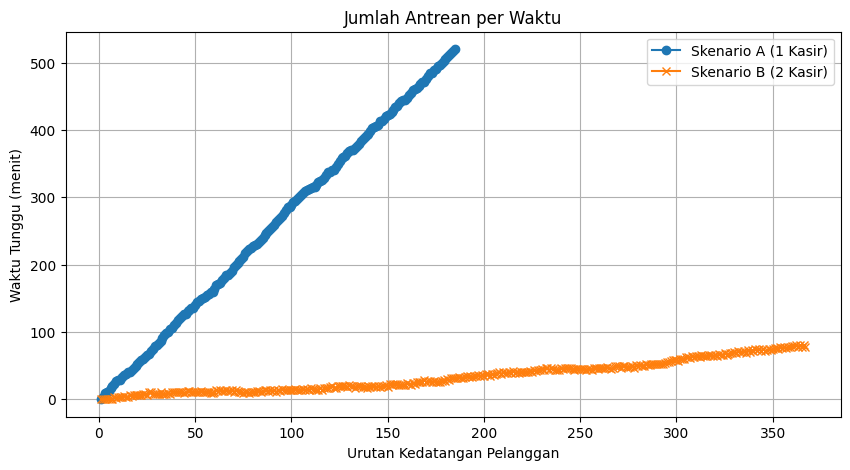

In [20]:
# 10. Visualisasi Jumlah Antrean seiring Waktu
plt.figure(figsize=(10, 5))
plt.plot(df_scenario_a.index + 1, df_scenario_a['queue_time'], marker='o', label='Skenario A (1 Kasir)')
plt.plot(df_scenario_b.index + 1, df_scenario_b['queue_time'], marker='x', label='Skenario B (2 Kasir)')
plt.title('Jumlah Antrean per Waktu')
plt.xlabel('Urutan Kedatangan Pelanggan')
plt.ylabel('Waktu Tunggu (menit)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# 11. Evaluasi Performa Sistem
# Menghitung rata-rata waktu tunggu untuk kedua skenario
avg_wait_scenario_a = df_scenario_a['queue_time'].mean()
avg_wait_scenario_b = df_scenario_b['queue_time'].mean()
print(f"Rata-rata waktu tunggu Skenario A (1 Kasir): {avg_wait_scenario_a:.2f} menit")
print(f"Rata-rata waktu tunggu Skenario B (2 Kasir): {avg_wait_scenario_b:.2f} menit")


Rata-rata waktu tunggu Skenario A (1 Kasir): 261.88 menit
Rata-rata waktu tunggu Skenario B (2 Kasir): 33.92 menit


In [22]:
# 12. Kesimpulan dan Rekomendasi
if avg_wait_scenario_b < avg_wait_scenario_a:
    print("Penambahan kasir (Skenario B) mengurangi waktu tunggu rata-rata, sehingga disarankan.")
else:
    print("Penambahan kasir (Skenario B) tidak memberikan perbaikan yang signifikan.")


Penambahan kasir (Skenario B) mengurangi waktu tunggu rata-rata, sehingga disarankan.
